# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [7]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


###  Import Statements


In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [10]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [11]:
df_general = pd.read_csv("NLSY97_Variable_Names_and_Descriptions.csv")

df_general.shape
df_general


,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
...,...,...,...
117,URBAN,D,Living in an urban area
118,REGNE,D,Census region North east
119,REGNC,D,Census region North central
120,REGW,D,Census region West


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [12]:
df_data.shape

# df_data.info()

(2000, 96)

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [13]:
duplicated_rows = df_data[df_data.ID.duplicated()]
duplicated_rows.shape

## drop duplicated:
df_clean = df_data.drop(duplicated_rows.index)

## drop missin values
df_clean = df_clean.dropna(axis=1)

print(f"Missing data: {df_clean.isna().values.any()}")
print(f"Duplicated data: {df_clean.duplicated().values.any()}")
print(f"Clean dataframe shape: {df_clean.shape}")


Missing data: False
Duplicated data: False
Clean dataframe shape: (1487, 80)


## Descriptive Statistics

In [14]:
df_clean[["EARNINGS", "S", "EXP"]].describe()

,EARNINGS,S,EXP
count,"1,487.00","1,487.00","1,487.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.65
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

In [15]:
df_clean[["S", "EXP"]].sample(10)

,S,EXP
443,14,9.65
934,19,4.00
1472,13,11.81
841,19,2.88
786,16,7.15
1120,16,2.38
995,11,6.83
708,11,11.35
1727,12,10.54
956,12,9.35


In [16]:
# df_clean["S"].describe()

print(f"Average earnings at 20 years schooling: ${df_clean[df_clean['S'] == 20]['EARNINGS'].mean():.2f}/h")
print(f"Average earnings at 19 years schooling: ${df_clean[df_clean['S'] == 19]['EARNINGS'].mean():.2f}/h")
print(f"Average earnings at 18 years schooling: ${df_clean[df_clean['S'] == 18]['EARNINGS'].mean():.2f}/h")
print(f"Average earnings at 17 years schooling: ${df_clean[df_clean['S'] == 17]['EARNINGS'].mean():.2f}/h")
print(f"Average earnings at 16 years schooling: ${df_clean[df_clean['S'] == 16]['EARNINGS'].mean():.2f}/h")
print(f"Average earnings at 15 years schooling: ${df_clean[df_clean['S'] == 15]['EARNINGS'].mean():.2f}/h")

Average earnings at 20 years schooling: $26.72/h
Average earnings at 19 years schooling: $24.59/h
Average earnings at 18 years schooling: $22.07/h
Average earnings at 17 years schooling: $21.52/h
Average earnings at 16 years schooling: $21.59/h
Average earnings at 15 years schooling: $17.45/h


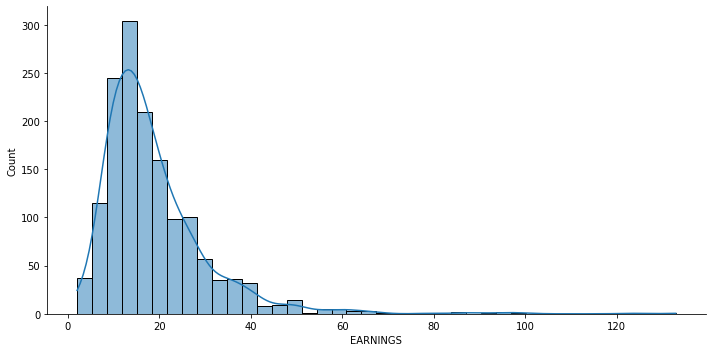

In [17]:
# EARNINGS DISTRIBUTION

sns.displot(df_clean["EARNINGS"], bins=40, kde=True, aspect=2)


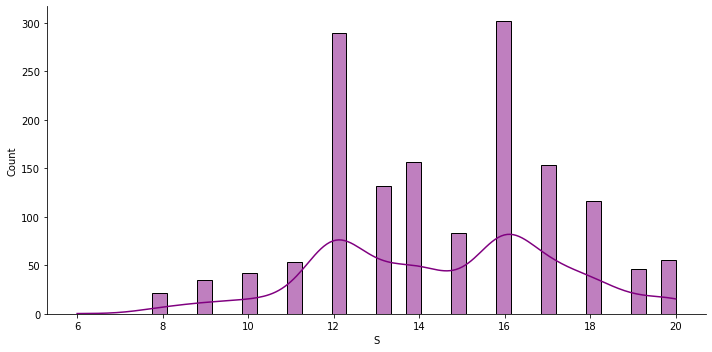

In [18]:
# SCHOOLING YEARS' DISTRIBUTION

sns.displot(df_clean["S"], bins=40, kde=True, aspect=2, color="purple")

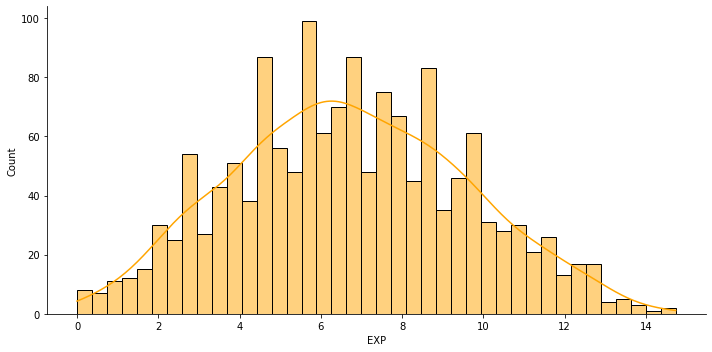

In [19]:
# WORK EXPERIENCE DISTRIBUTION

sns.displot(df_clean["EXP"], bins=40, kde=True, aspect=2, color="orange")

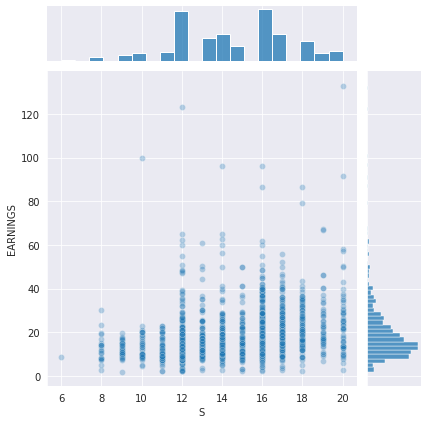

In [20]:
# SCHOOLING vs EARNINGS

with sns.axes_style("darkgrid"):
  sns.jointplot(x=df_clean["S"], y=df_clean["EARNINGS"], joint_kws={"alpha": 0.3})

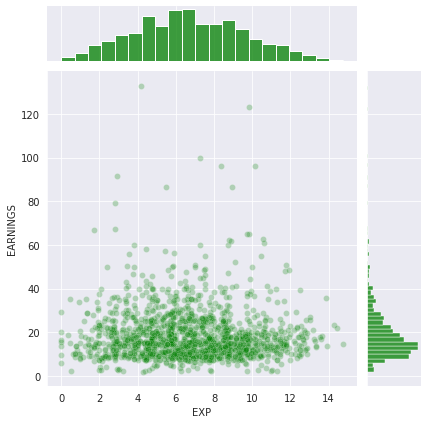

In [21]:
# WORK EXP vs EARNINGS

with sns.axes_style("darkgrid"):
  sns.jointplot(x=df_clean["EXP"], y=df_clean["EARNINGS"], joint_kws={"alpha": 0.25}, color="green")

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [22]:
## Split dataset

target = pd.DataFrame(df_clean["EARNINGS"])
features = pd.DataFrame(df_clean["S"])


X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, random_state=10) 

print(X_train.shape)
print(y_train.shape)

(1189, 1)
(1189, 1)


In [23]:
# % of training test:
train_pct = len(X_train) / len(features) *100
print(f"Training data is {train_pct:.2f}% of total data")

# % of test data:
test_pct = X_test.shape[0] / features.shape[0] *100
print(f"Test data is {test_pct:.2f}% of total data")

Training data is 79.96% of total data
Test data is 20.04% of total data


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

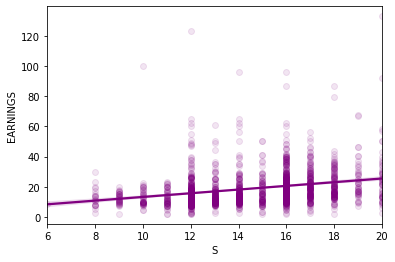

In [24]:
# regression

sns.regplot(x=df_clean["S"], y=df_clean["EARNINGS"], color="purple", scatter_kws={"alpha":0.1})


In [25]:
## schooling regression

regr = LinearRegression()
regr.fit(X_train, y_train)
r_squared = regr.score(X_train, y_train)
print(f"Simple regression (variable: schooling years) - Training data R-squared: {r_squared:.3f}")

Simple regression (variable: schooling years) - Training data R-squared: 0.081


In [26]:
## Split dataset, Log target

new_target = pd.DataFrame(df_clean["EARNINGS"])
new_target = np.log(new_target)
school_feature = pd.DataFrame(df_clean["S"])

X_train, X_test, log_y_train, log_y_test = train_test_split(school_feature, new_target, 
                                                            test_size=0.2, random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_r_squared = log_regr.score(X_train, log_y_train)
print(f"Log regression - Training data R-squared: {log_r_squared:.3f}")

Log regression - Training data R-squared: 0.102


In [27]:
# MODELS COMPARISON:

print(f"Original model - Test data R-squared: {regr.score(X_test, y_test):.3f}")
print(f"Log model - Test data R-squared: {log_regr.score(X_test, log_y_test):.3f}")

Original model - Test data R-squared: 0.073
Log model - Test data R-squared: 0.126


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [28]:
## NORMAL COEFFICIENT
print(f"Normal regression: dollars per hour for extra year of education: {regr.coef_[0][0]:.2f}")


## LOG COEFFICIENT
print(f"Log regression: dollars per hour for extra year of education: {log_regr.coef_[0][0]:.2f}")

Normal regression: dollars per hour for extra year of education: 1.22
Log regression: dollars per hour for extra year of education: 0.06


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [29]:
predicted_values = regr.predict(X_train)
residuals = y_train - predicted_values

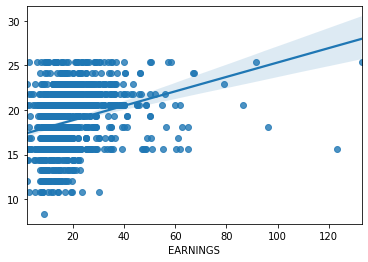

In [30]:
# Comparing real values vs predicted values:
fig = sns.regplot(x=y_train, y=predicted_values)


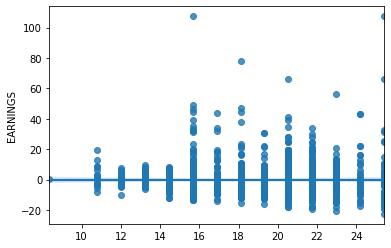

In [31]:
# Comparing predicted values with residuals

sns.regplot(x=predicted_values, y=residuals)

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [32]:
## Split multi variable dataset:

target = pd.DataFrame(df_clean["EARNINGS"])
multi_features = pd.DataFrame(df_clean[["S", "EXP"]])

X_train, X_test, y_train, y_test = train_test_split(multi_features, target, test_size=0.2, random_state=10)



In [33]:
## Regression:

multi_regr = LinearRegression()
multi_regr.fit(X_train, y_train)
multi_r_squared = multi_regr.score(X_train, y_train)
print(f"Multi variable regression - Training data R-squared: {multi_r_squared:.3f}")

Multi variable regression - Training data R-squared: 0.117


In [34]:
## Split dataset with log target

log_target = np.log(pd.DataFrame(df_clean["EARNINGS"]))
# log_target = np.log(log_target)
multi_features = pd.DataFrame(df_clean[["S", "EXP"]])

X_train, X_test, log_y_train, log_y_test = train_test_split(multi_features, log_target, test_size=0.2, random_state=10)


In [35]:
## Regression with log

log_multi_regr = LinearRegression()
log_multi_regr.fit(X_train, log_y_train)

r_squared = log_multi_regr.score(X_train, log_y_train)
print(f"Log multi variable regression - Training data (log target) R-squared: {r_squared:.3f}")

Log multi variable regression - Training data (log target) R-squared: 0.158


### Evaluate the Coefficients of the Model

In [36]:
school_coef_multi_log = round(log_multi_regr.coef_[0][0], 3)
print(f"Years of school - regression coef: {school_coef_multi_log}")

exp_coef_multi_log = round(log_multi_regr.coef_[0][1], 3)
print(f"Years of working experience - regression coef: {exp_coef_multi_log}")


log_multi_regr.coef_

Years of school - regression coef: 0.097
Years of working experience - regression coef: 0.057


array([[0.09735617, 0.05720876]])

### Analyse the Estimated Values & Regression Residuals

In [37]:
# predicted_values = regr.predict(X_train)
# predicted_values
# residuals = (log_y_train - predicted_values)
# residuals

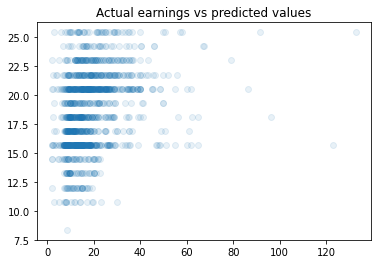

Text(0.5, 1.0, '\nResiduals vs predicted values')

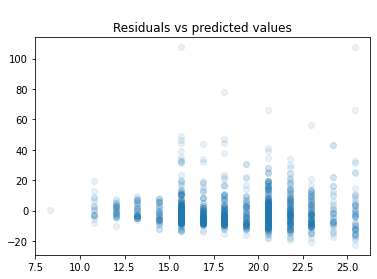

In [38]:
# actual earnings vs predicted earnings - regression


plt.scatter(x=y_train, y=predicted_values, alpha=0.1)
plt.title("Actual earnings vs predicted values")
plt.show()

# residuals vs predicted earnings

plt.scatter(x=predicted_values, y=residuals, alpha=0.1)
plt.title("\nResiduals vs predicted values")

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [39]:
## replica day 80;

features = df_clean[["S", "EXP"]]
average_vals = features.mean().values
earnings_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), columns=features.columns)
print(earnings_stats)

log_estimate = log_multi_regr.predict(earnings_stats)[0][0]
print(f"The log earnings estimate is: ${log_estimate:.3f}/h")

# Reversing log transformation:
actual_estimate = np.exp(log_estimate)
print(f"The actual average wage is estimated to be ${actual_estimate:.2f}/h")


      S  EXP
0 14.56 6.70
The log earnings estimate is: $2.776/h
The actual average wage is estimated to be $16.06/h


In [40]:
## Predictions with given data

bachelor_degree = 12+4
work_exp = 5

earnings_stats["S"] = bachelor_degree
earnings_stats["EXP"] = work_exp
# print(earnings_stats)

log_estimate = log_multi_regr.predict(earnings_stats)[0][0]
print(f"The log earnings estimate for {bachelor_degree} schooling years \nand {work_exp} years working exp is: ${log_estimate:.3f}/h\n")

actual_estimate = np.exp(log_estimate)
print(f"The actual earnings estimate for {bachelor_degree} schooling years \nand {work_exp} years working exp is: ${actual_estimate:.2f}/h")


## Actual mean earnings with given data

a = df_clean.loc[(df_clean["S"] == bachelor_degree) & (df_clean["EXP"] == work_exp)]
print(f"Actual mean earnings with given data: ${a['EARNINGS'].min():.2f}/h")

The log earnings estimate for 16 schooling years 
and 5 years working exp is: $2.819/h

The actual earnings estimate for 16 schooling years 
and 5 years working exp is: $16.77/h
Actual mean earnings with given data: $19.00/h


In [41]:


# schooling_log_coef = log_multi_regr.coef_[0][0]
# print(schooling_log_coef)
# work_exp_log_coef = log_multi_regr.coef_[0][1]
# print(work_exp_log_coef)
# log_premium = (schooling_log_coef * bachelor_degree) + (work_exp_log_coef * work_exp)
# print(f"log_premium: {log_premium:.2f}")

# schooling_coef = np.exp(schooling_log_coef)
# work_exp_coef = np.exp(work_exp_log_coef)


# premium = (schooling_coef * bachelor_degree) + (work_exp_coef * work_exp)
# print(f"premium: {premium:.2f}")



# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [ ]:
## Comparing predictions and actual earning values given real combinations of S and EXP


import random as r


index_list = df_clean.index.unique()

data_dict = {}
sample = 1000


for n in range(sample):
  index = r.choice(index_list)
  all_s = df_clean["S"]
  all_exp = df_clean["EXP"]

  s_exp = all_s[index]
  work_exp = all_exp[index]

  data_dict[n] = {"S": s_exp, "EXP": work_exp}

# print(data_dict)

# ##################################


combinations={}
count=0

for i in range(len(data_dict)):
    bachelor_degree = data_dict[i]["S"]
    work_exp = data_dict[i]["EXP"]

    earnings_stats["S"] = bachelor_degree
    earnings_stats["EXP"] = work_exp
    # print(earnings_stats)

    log_estimate = log_multi_regr.predict(earnings_stats)[0][0]
    # print(${log_estimate:.3f}/h\n")

    actual_estimate = np.exp(log_estimate)
    # print(f"${actual_estimate:.2f}/h")


    ## Actual mean earnings with given data
    a = df_clean.loc[(df_clean["S"] == bachelor_degree) & (df_clean["EXP"] == work_exp)]
    real_value = round(a['EARNINGS'].mean(), 2)
    # print(f"${real_value}/h")

    combinations[count] = {"prediction": round(actual_estimate, 2),
                          "real_value": real_value}
    count += 1

combinations



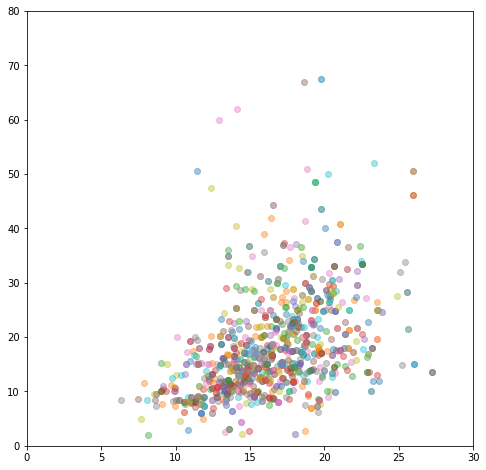

In [50]:
## Plotting predictions and actual values

all_predictions = []
all_real_values = []

for n in range(len(combinations)):
  all_predictions.append(combinations[n]["prediction"])
  all_real_values.append(combinations[n]["real_value"])

g = []
for i in range(len(all_predictions)):
  g.append([all_predictions[i], all_real_values[i]])
g

plt.figure(figsize=(8, 8))
plt.xlim(0, 30)
plt.ylim(0, 80)

for key in range(len(g)):
  predict = g[key][0] 
  actual_value = g[key][1]
  fig = plt.scatter(predict, actual_value, label=key, alpha=0.4)

